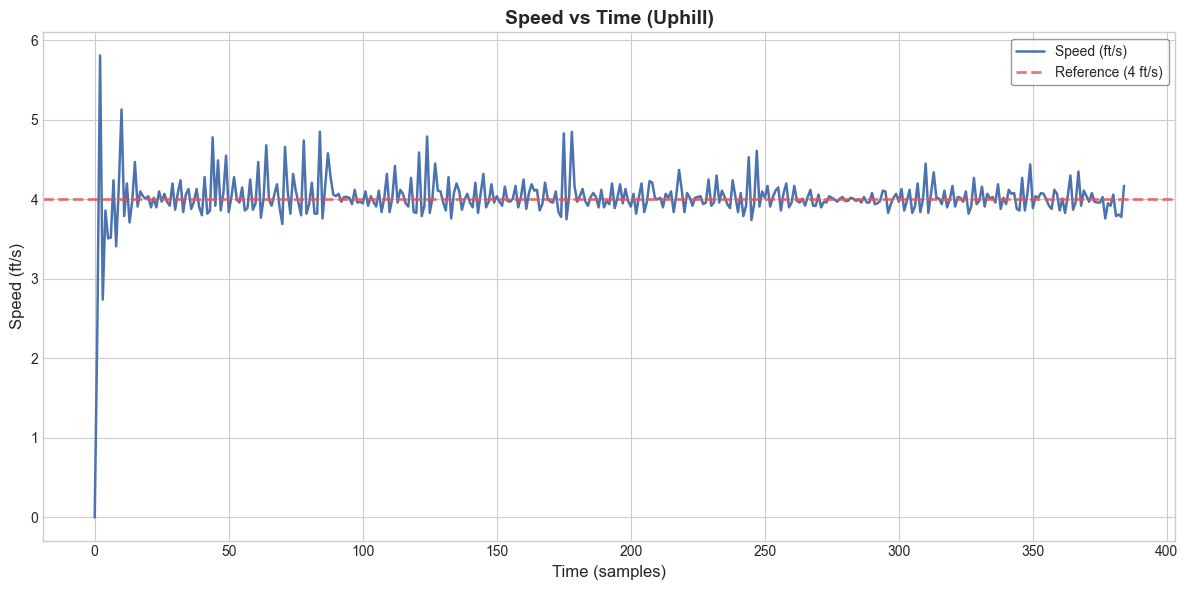

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from a text file (one value per line)
with open("speed_data_flat.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

time = np.arange(len(data))  # Simple time axis

# --- Plot ---
plt.style.use("seaborn-v0_8-whitegrid")  # Clean background with grid
plt.figure(figsize=(12, 6))

plt.plot(time, data, color="#4C72B0", linewidth=1.8, label="Speed (ft/s)")  # Soft blue line
plt.axhline(y=4, color="#E15759", linestyle="--", linewidth=2, alpha=0.8, label="Reference (4 ft/s)")  # Soft red line

# Labels and title
plt.xlabel("Time (samples)", fontsize=12)
plt.ylabel("Speed (ft/s)", fontsize=12)
plt.title("Speed vs Time (Uphill)", fontsize=14, weight="bold")

# Legend and layout
plt.legend(frameon=True, facecolor="white", edgecolor="gray")
plt.tight_layout()
plt.show()



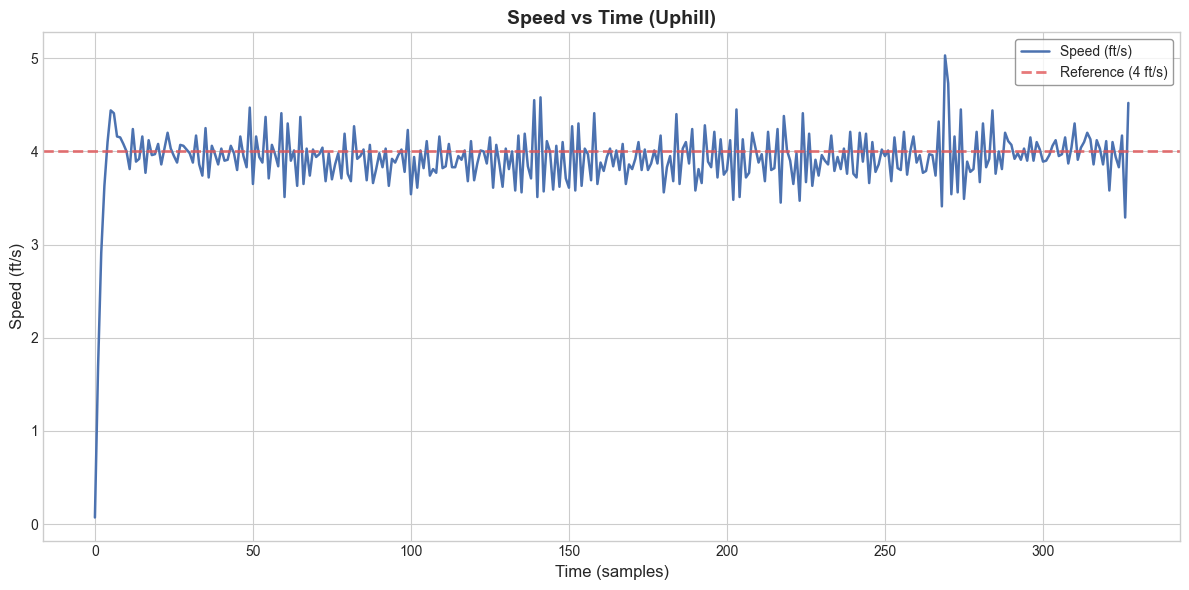

In [13]:
# Read data from a text file (one value per line)
with open("speed_data_uphill.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

time = np.arange(len(data))  # Simple time axis

# --- Plot ---
plt.style.use("seaborn-v0_8-whitegrid")  # Clean background with grid
plt.figure(figsize=(12, 6))

plt.plot(time, data, color="#4C72B0", linewidth=1.8, label="Speed (ft/s)")  # Soft blue line
plt.axhline(y=4, color="#E15759", linestyle="--", linewidth=2, alpha=0.8, label="Reference (4 ft/s)")  # Soft red line

# Labels and title
plt.xlabel("Time (samples)", fontsize=12)
plt.ylabel("Speed (ft/s)", fontsize=12)
plt.title("Speed vs Time (Uphill)", fontsize=14, weight="bold")

# Legend and layout
plt.legend(frameon=True, facecolor="white", edgecolor="gray")
plt.tight_layout()
plt.show()




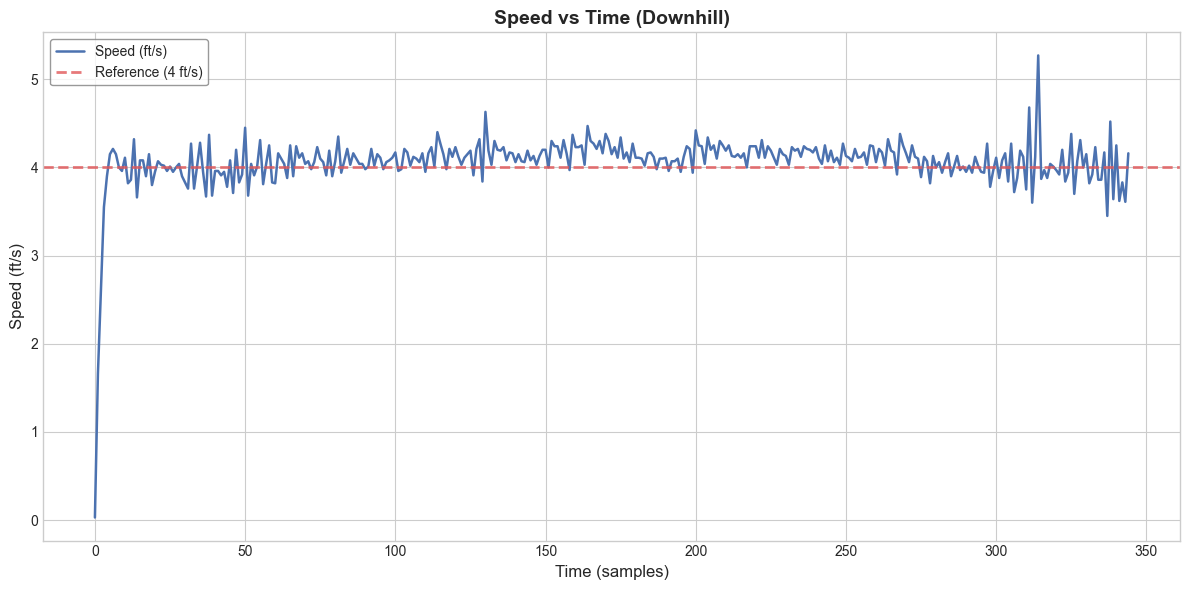

In [14]:
# Read data from a text file (one value per line)
with open("speed_data_downhill.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

time = np.arange(len(data))  # Simple time axis

# --- Plot ---
plt.style.use("seaborn-v0_8-whitegrid")  # Clean background with grid
plt.figure(figsize=(12, 6))

plt.plot(time, data, color="#4C72B0", linewidth=1.8, label="Speed (ft/s)")  # Soft blue line
plt.axhline(y=4, color="#E15759", linestyle="--", linewidth=2, alpha=0.8, label="Reference (4 ft/s)")  # Soft red line

# Labels and title
plt.xlabel("Time (samples)", fontsize=12)
plt.ylabel("Speed (ft/s)", fontsize=12)
plt.title("Speed vs Time (Downhill)", fontsize=14, weight="bold")

# Legend and layout
plt.legend(frameon=True, facecolor="white", edgecolor="gray")
plt.tight_layout()
plt.show()


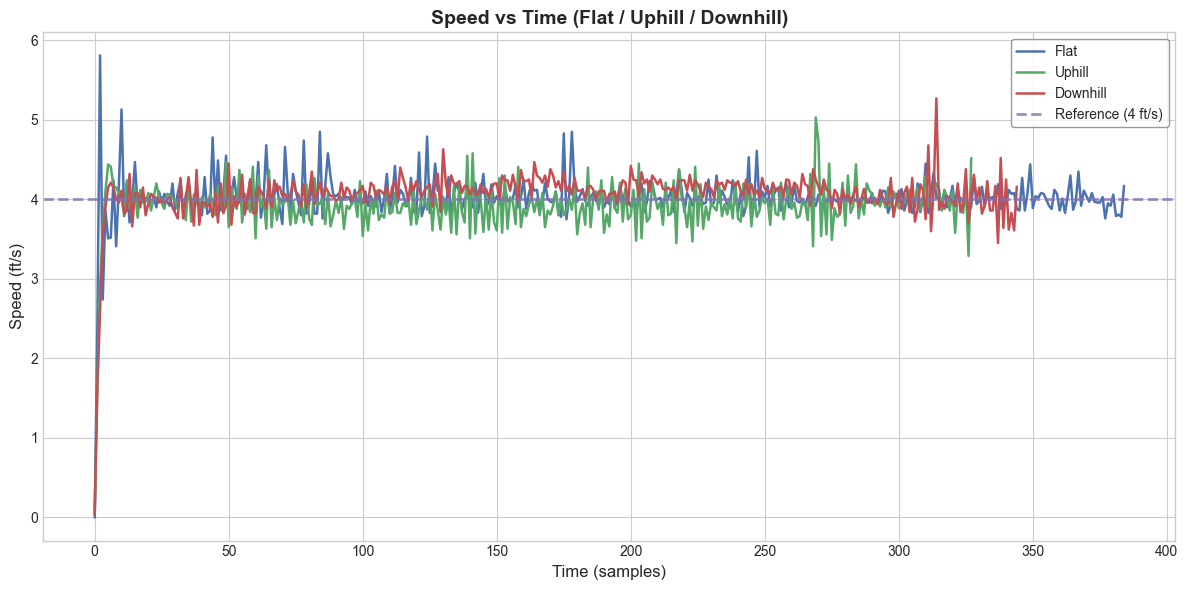

In [4]:
def read_data(file):
    with open(file, "r") as f:
        return [float(line.strip()) for line in f if line.strip()]

# Read data from files (replace with your actual filenames)
flat = read_data("speed_data_flat.txt")
uphill = read_data("speed_data_uphill.txt")
downhill = read_data("speed_data_downhill.txt")

# Make time axes (assuming same sample rate for all)
time_flat = np.arange(len(flat))
time_uphill = np.arange(len(uphill))
time_downhill = np.arange(len(downhill))

# --- Single-Graph Plot ---
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(12, 6))

# Plot all three datasets on one graph
plt.plot(time_flat, flat, color="#4C72B0", linewidth=1.8, label="Flat")
plt.plot(time_uphill, uphill, color="#55A868", linewidth=1.8, label="Uphill")
plt.plot(time_downhill, downhill, color="#C44E52", linewidth=1.8, label="Downhill")

# Reference line
plt.axhline(y=4, color="#8172B2", linestyle="--", linewidth=2, alpha=0.8, label="Reference (4 ft/s)")

# Labels and title
plt.xlabel("Time (samples)", fontsize=12)
plt.ylabel("Speed (ft/s)", fontsize=12)
plt.title("Speed vs Time (Flat / Uphill / Downhill)", fontsize=14, weight="bold")

# Legend & layout
plt.legend(frameon=True, facecolor="white", edgecolor="gray")
plt.tight_layout()
plt.show()


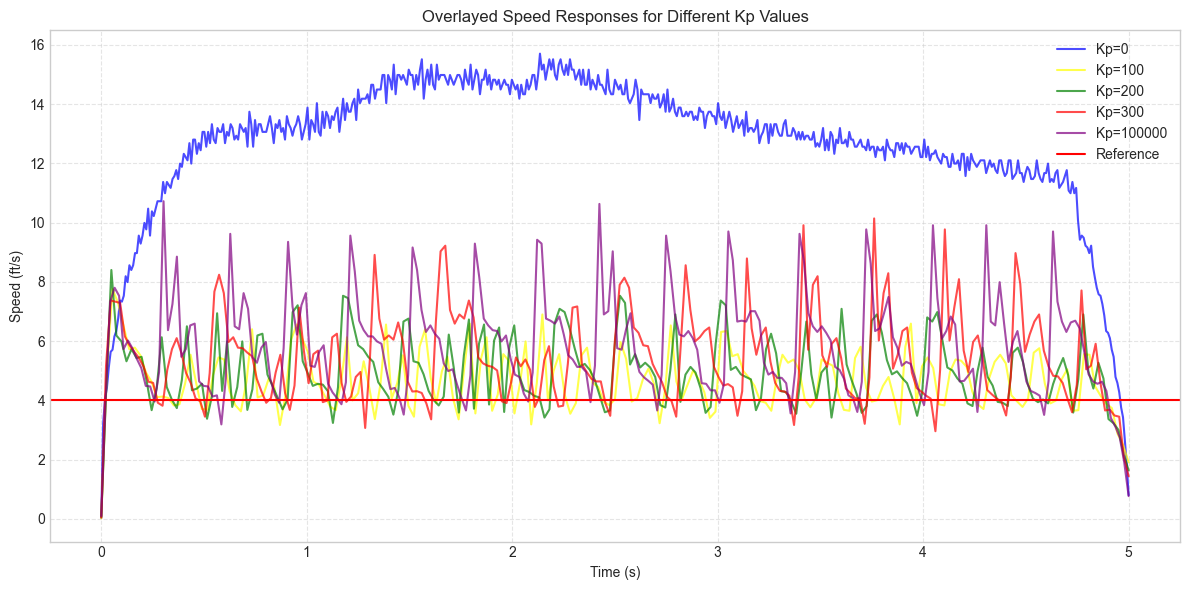

In [5]:


# List of your data files and corresponding Kp values
files = ["kp0.txt", "kp100.txt", "kp200.txt", "kp300.txt", "kp100000.txt"]
kp_values = [0, 100, 200, 300, 100000]

# Duration of each file in seconds
duration = 5


ref_value = 4.0  

# Initialize time offset for plotting files consecutively
time_offset = 0

plt.figure(figsize=(12, 6))

colors = ['blue', 'yellow', 'green', 'red', "purple"]

for i, f in enumerate(files):
    # Load data
    data = np.loadtxt(f)
    n_samples = len(data)
    
    # Normalize time axis
    t = np.linspace(0, duration, n_samples)
    
    # Plot the data
    plt.plot(t, data, alpha=0.7, color=colors[i], label=f"Kp={kp_values[i]}")

# Plot reference line
plt.axhline(ref_value, color='red', linestyle='-', linewidth=1.5, label='Reference')

plt.xlabel("Time (s)")
plt.ylabel("Speed (ft/s)")
plt.title("Overlayed Speed Responses for Different Kp Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

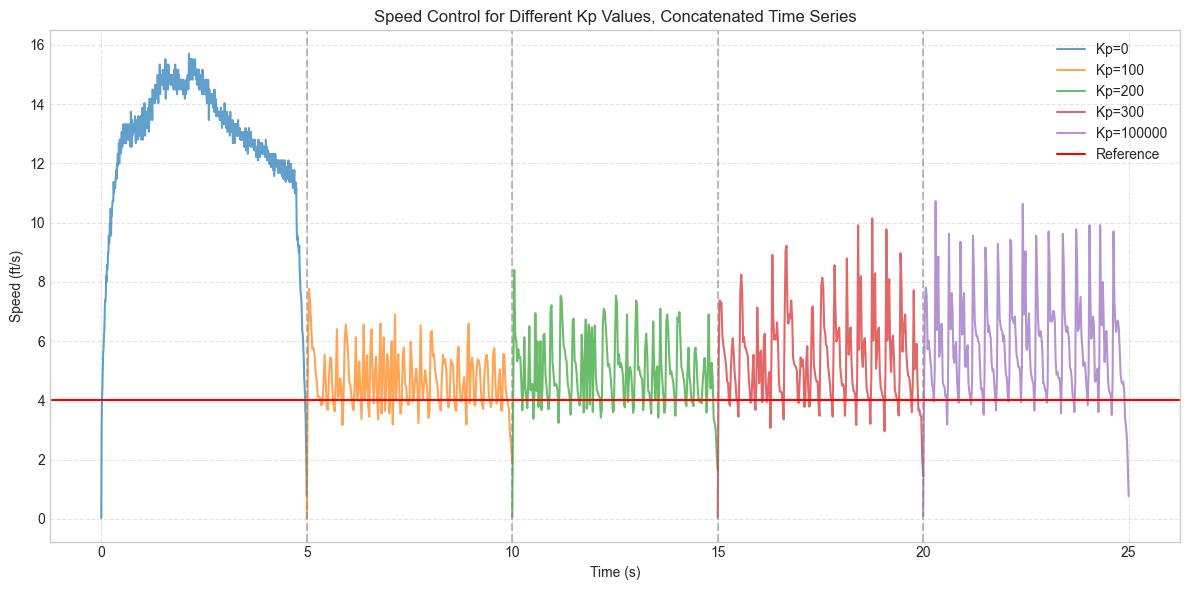

In [6]:


# List of your data files and corresponding Kp values
files = ["kp0.txt", "kp100.txt", "kp200.txt", "kp300.txt", "kp100000.txt"]
kp_values = [0, 100, 200, 300, 100000]


# Duration of each file in seconds
duration = 5

ref_value = 4.0  

# Initialize time offset for plotting files consecutively
time_offset = 0

plt.figure(figsize=(12, 6))

for i, f in enumerate(files):
    # Load data
    data = np.loadtxt(f)
    n_samples = len(data)
    
    # Normalize time axis
    t = np.linspace(0, duration, n_samples) + time_offset
    
    # Plot the data
    plt.plot(t, data, alpha=0.7, label=f"Kp={kp_values[i]}")
    
    # Mark Kp section with vertical line at start (except first)
    if i > 0:
        plt.axvline(time_offset, color='gray', linestyle='--', alpha=0.5)
    
    # Update time offset
    time_offset += duration

# Plot reference line
plt.axhline(ref_value, color='red', linestyle='-', linewidth=1.5, label='Reference')

plt.xlabel("Time (s)")
plt.ylabel("Speed (ft/s)")
plt.title("Speed Control for Different Kp Values, Concatenated Time Series")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


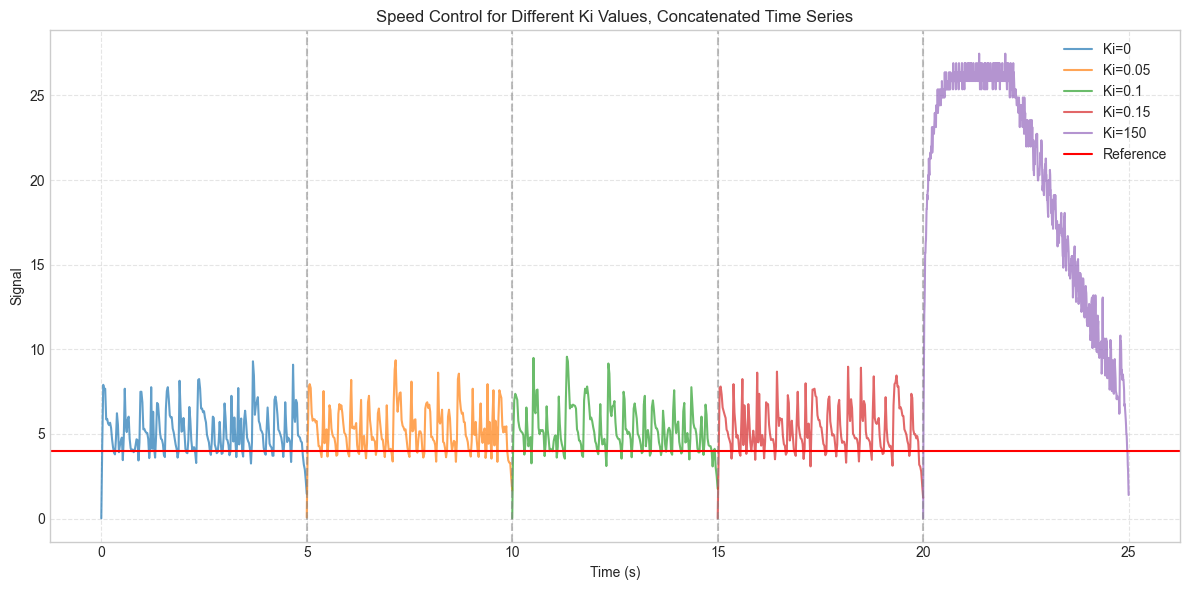

In [7]:

# List of  data files and corresponding Ki values
files = ["ki0.txt", "ki0.05.txt", "ki0.1.txt", "ki0.15.txt", "ki150.txt"]
kp_values = [0, 0.05, 0.1, 0.15, 150]


# Duration of each file in seconds
duration = 5

ref_value = 4.0  

# Initialize time offset for plotting files consecutively
time_offset = 0

plt.figure(figsize=(12, 6))

for i, f in enumerate(files):
    # Load data
    data = np.loadtxt(f)
    n_samples = len(data)
    
    # Normalize time axis
    t = np.linspace(0, duration, n_samples) + time_offset
    
    # Plot the data
    plt.plot(t, data, alpha=0.7, label=f"Ki={kp_values[i]}")
    
    # Mark Kp section with vertical line at start (except first)
    if i > 0:
        plt.axvline(time_offset, color='gray', linestyle='--', alpha=0.5)
    
    # Update time offset
    time_offset += duration

# Plot reference line
plt.axhline(ref_value, color='red', linestyle='-', linewidth=1.5, label='Reference')

plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Speed Control for Different Ki Values, Concatenated Time Series")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


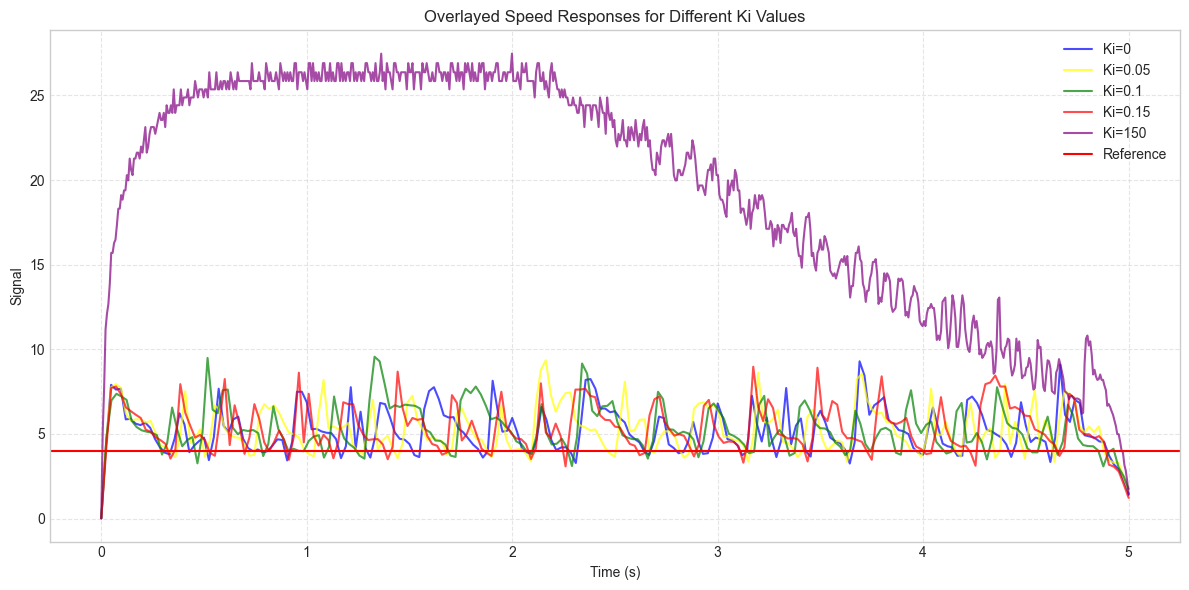

In [8]:
# List of  data files and corresponding Ki values
files = ["ki0.txt", "ki0.05.txt", "ki0.1.txt", "ki0.15.txt", "ki150.txt"]
kp_values = [0, 0.05, 0.1, 0.15, 150]

# Duration of each file in seconds
duration = 5


ref_value = 4.0  

# Initialize time offset for plotting files consecutively
time_offset = 0

plt.figure(figsize=(12, 6))

colors = ['blue', 'yellow', 'green', 'red', "purple"]

for i, f in enumerate(files):
    # Load data
    data = np.loadtxt(f)
    n_samples = len(data)
    
    # Normalize time axis
    t = np.linspace(0, duration, n_samples)
    
    # Plot the data
    plt.plot(t, data, alpha=0.7, color=colors[i], label=f"Ki={kp_values[i]}")

# Plot reference line
plt.axhline(ref_value, color='red', linestyle='-', linewidth=1.5, label='Reference')

plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Overlayed Speed Responses for Different Ki Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

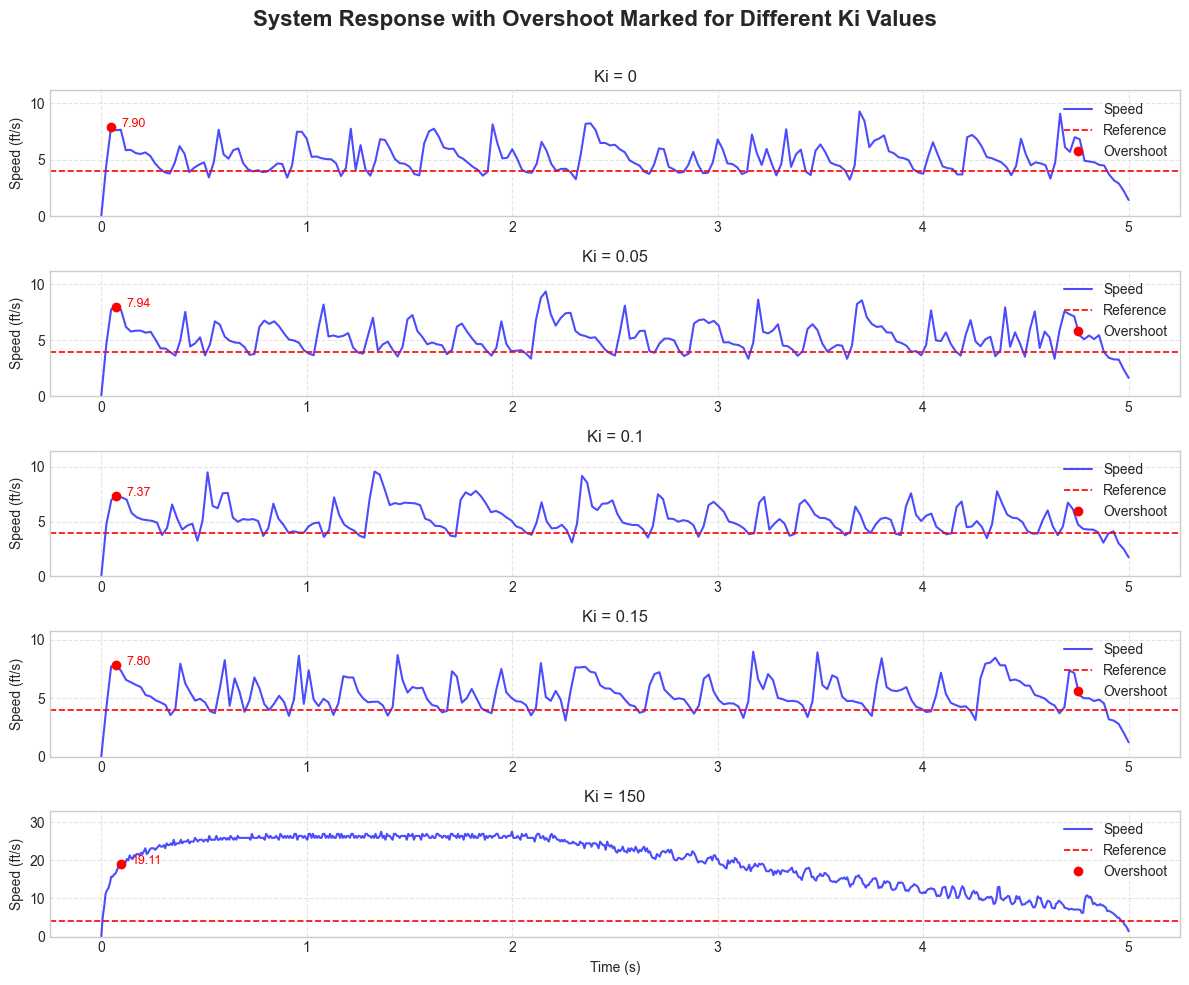

In [15]:
from scipy.signal import find_peaks
files = ["ki0.txt", "ki0.05.txt", "ki0.1.txt", "ki0.15.txt", "ki150.txt"]
ki_values = [0, 0.05, 0.1, 0.15, 150]

# Duration of each file in seconds
duration = 5
ref_value = 4.0  

plt.figure(figsize=(12, 10))
plt.suptitle("System Response with Overshoot Marked for Different Ki Values", fontsize=16, fontweight="bold")

for i, f in enumerate(files):
    # Load data
    data = np.loadtxt(f)
    n_samples = len(data)
    t = np.linspace(0, duration, n_samples)
    
    # Find indices where data first crosses the reference
    cross_indices = np.where(data >= ref_value)[0]
    
    first_local_max_time = None
    first_local_max_value = None
    
    if len(cross_indices) > 0:
        start_idx = cross_indices[0]
        # Find peaks after the first crossing
        peaks, _ = find_peaks(data[start_idx:])
        if len(peaks) > 0:
            first_local_max_value = data[start_idx + peaks[0]]
            first_local_max_time = t[start_idx + peaks[0]]
    
    # Create subplot
    plt.subplot(len(files), 1, i+1)
    plt.plot(t, data, alpha=0.7, color='blue', label='Speed')
    plt.axhline(ref_value, color='red', linestyle='--', linewidth=1.2, label='Reference')
    
    # Mark first local maximum after crossing and annotate value
    if first_local_max_time is not None:
        plt.plot(first_local_max_time, first_local_max_value, 'ro', label='Overshoot')
        plt.text(first_local_max_time + 0.05, first_local_max_value,
                 f"{first_local_max_value:.2f}", color='red', fontsize=9)
    
    plt.title(f"Ki = {ki_values[i]}")
    plt.ylabel("Speed (ft/s)")
    plt.ylim(0, max(ref_value*1.5, max(data)*1.2))
    plt.grid(True, linestyle='--', alpha=0.5)
    
    if i == len(files) - 1:
        plt.xlabel("Time (s)")
    
    # Only show legend once per subplot (and only if overshoot exists)
    plt.legend(loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.show()

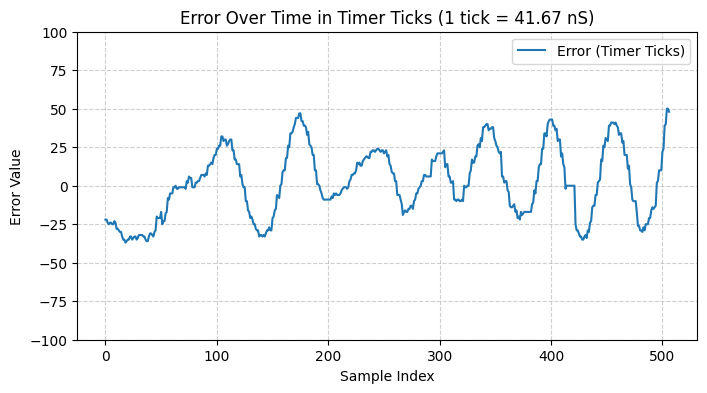

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from a text file (one value per line)
with open("nav2.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

# Convert to numpy array for convenience
data = np.array(data)[100:]

# Generate x-axis as indices
x = np.arange(len(data))

# Plot the error data
plt.figure(figsize=(8, 4))
plt.plot(x, data, label="Error (Timer Ticks)", color="tab:blue")
plt.xlabel("Timer Ticks")
plt.ylabel("Error Value")
plt.title("Error Over Time in Timer Ticks (1 tick = 41.67 nS)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.ylim(-100,100)
plt.show()


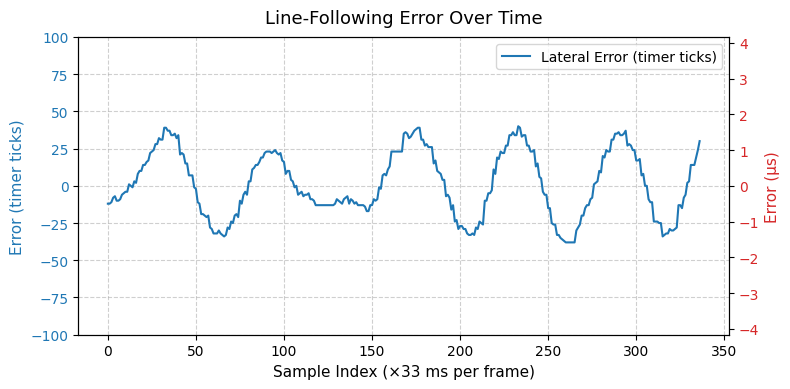

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("nav2.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


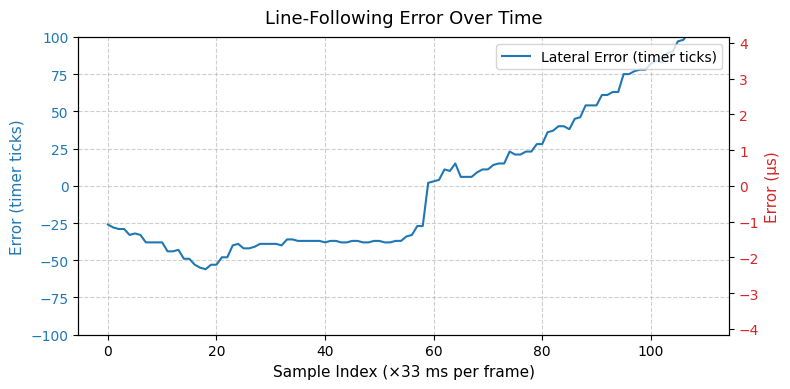

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kp0nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


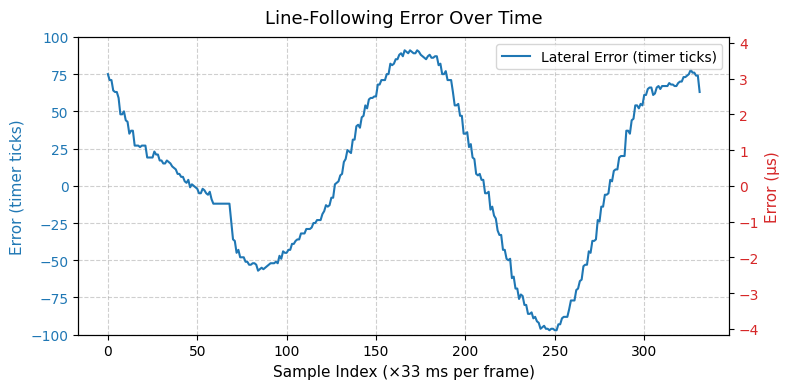

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kp05nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


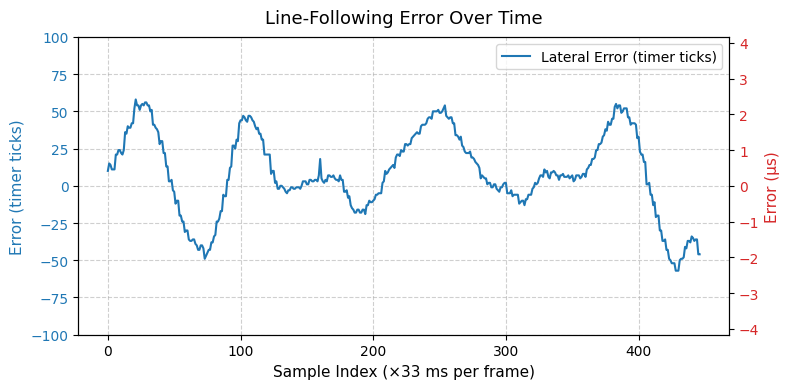

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kp1nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


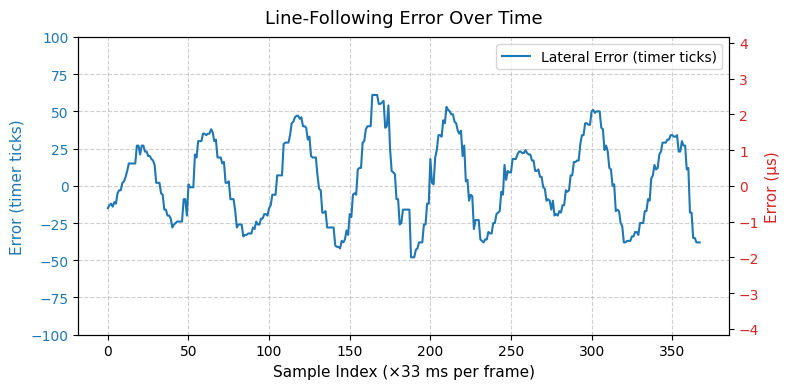

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kp25nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


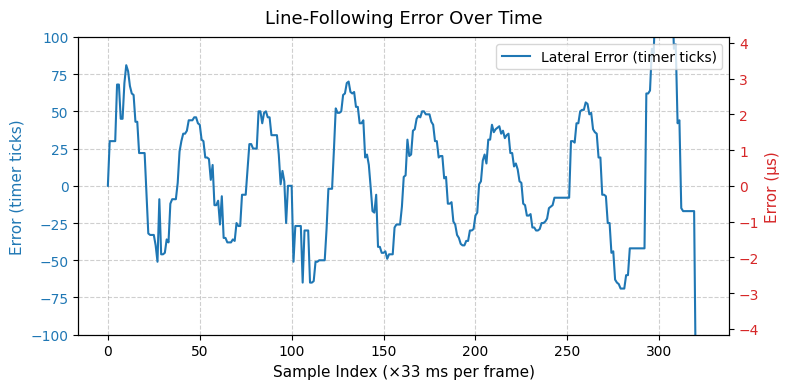

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kp25nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


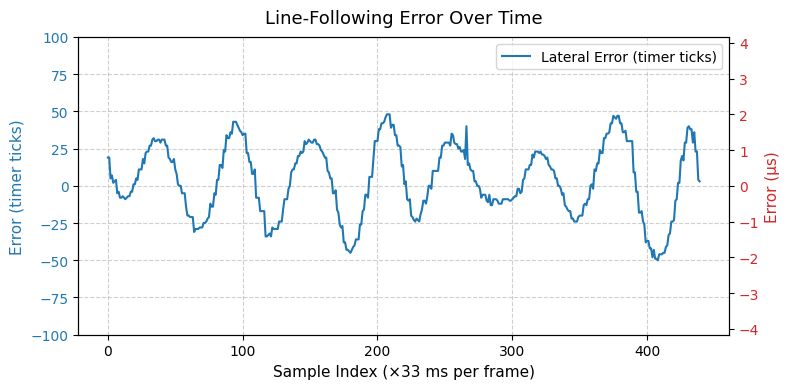

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kd0nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


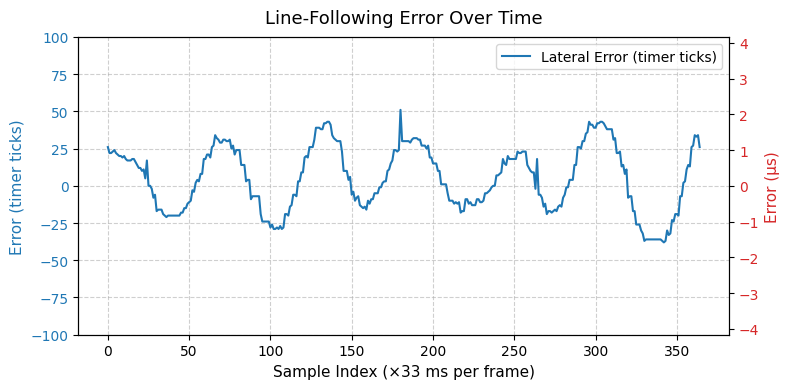

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kd05nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


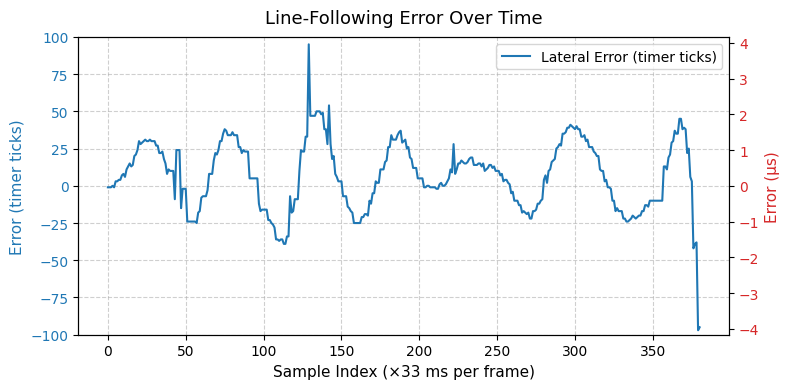

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kd15nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


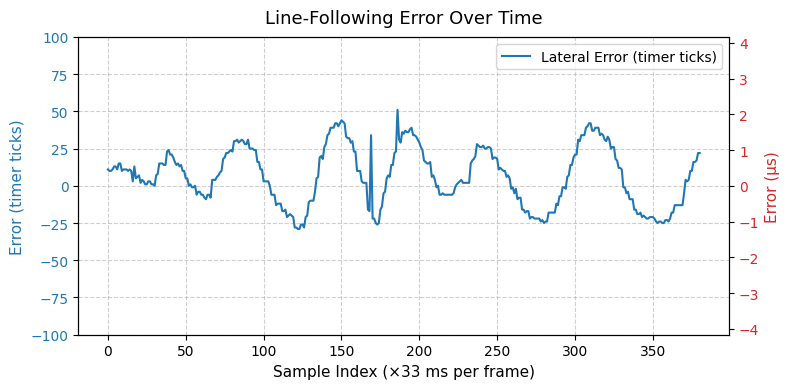

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Load Data
# -----------------------------------------
with open("kd2nav.txt", "r") as f:
    data = [float(line.strip()) for line in f if line.strip()]

data = np.array(data)[100:]   # discard first 100 samples for stabilization
x = np.arange(len(data))

# -----------------------------------------
# Constants and Conversion
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)
data_us = data * TICK_PERIOD_US        # convert to microseconds for reference

# -----------------------------------------
# Plot Error Over Time
# -----------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

# Primary y-axis: timer ticks
line1, = ax1.plot(x, data, label="Lateral Error (timer ticks)",
                  color="tab:blue", linewidth=1.5)
ax1.set_xlabel("Sample Index (×33 ms per frame)", fontsize=11)
ax1.set_ylabel("Error (timer ticks)", fontsize=11, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_ylim(-100, 100)

# Secondary y-axis: microseconds
ax2 = ax1.twinx()
ax2.set_ylabel("Error (µs)", fontsize=11, color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_ylim(ax1.get_ylim()[0] * TICK_PERIOD_US,
             ax1.get_ylim()[1] * TICK_PERIOD_US)

# Title and legend
plt.title("Line-Following Error Over Time", fontsize=13, pad=10)
ax1.legend(handles=[line1], loc="upper right")

plt.tight_layout()
plt.show()


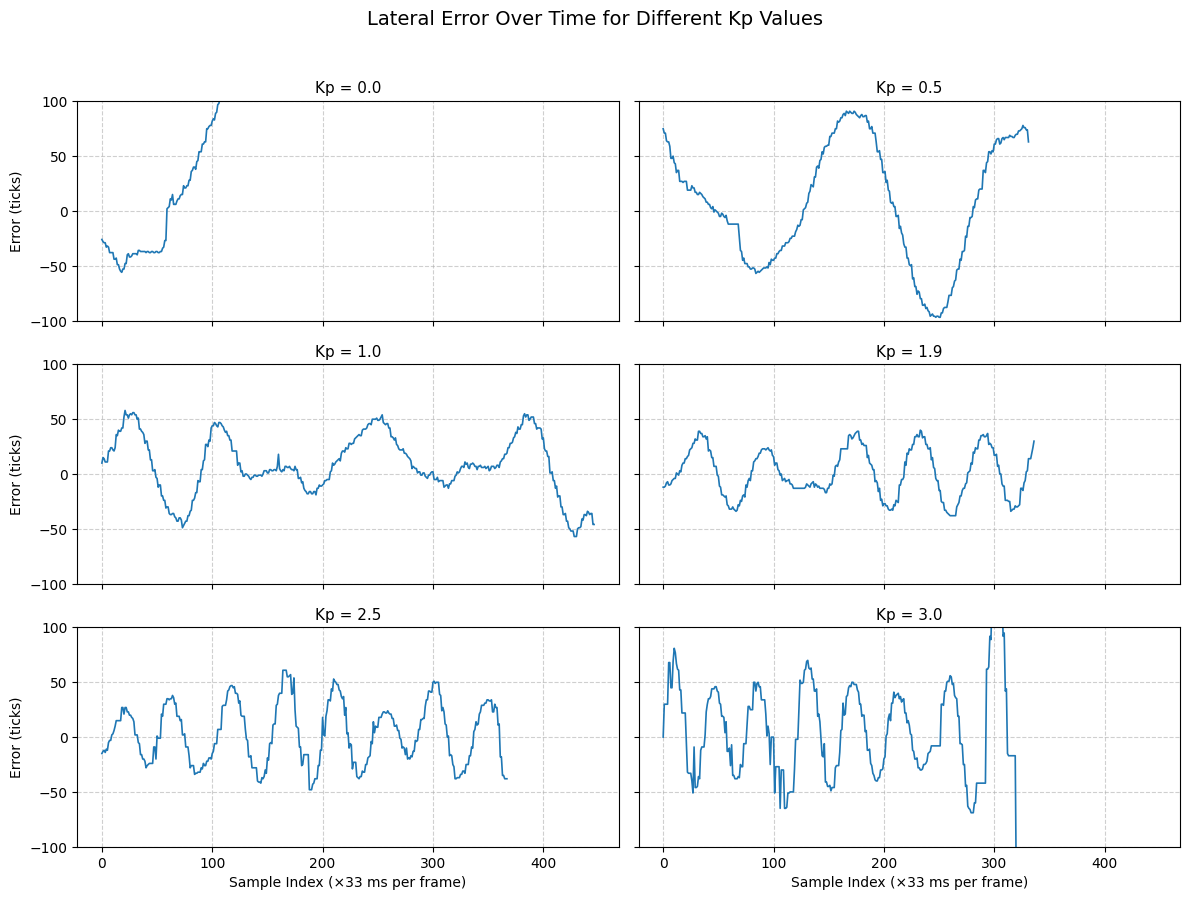

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import math

# -----------------------------------------
# Load all files matching kp*nav.txt
# -----------------------------------------
file_list = sorted(glob.glob("kp*nav.txt"))  # e.g. kp1nav.txt, kp2nav.txt, ...
if not file_list:
    raise FileNotFoundError("No files matching pattern 'kp*nav.txt' found.")

# -----------------------------------------
# Constants
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
datasets = []
for fname in file_list:
    with open(fname, "r") as f:
        data = [float(line.strip()) for line in f if line.strip()]
    data = np.array(data)[100:]  # discard startup
    x = np.arange(len(data))

    # Try to extract Kp value from filename (e.g., "kp1.5nav.txt" -> 1.5)
    m = re.search(r"kp([0-9.]+)", fname)
    kp_value = m.group(1) if m else fname
    datasets.append((kp_value, x, data))

# -----------------------------------------
# Plot each dataset in a 2×3 grid
# -----------------------------------------
cols, rows = 2, 3
num_plots = len(datasets)
num_rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(num_rows, cols, figsize=(12, 3*num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, (kp_value, x, data) in enumerate(datasets):
    ax = axes[i]
    ax.plot(x, data, label=f"Kp = {kp_value}", color="tab:blue", linewidth=1.2)
    ax.set_title(f"Kp = {kp_value}", fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_ylim(-100, 100)
    if i % cols == 0:
        ax.set_ylabel("Error (ticks)", fontsize=10)
    if i >= (num_rows - 1) * cols:
        ax.set_xlabel("Sample Index (×33 ms per frame)", fontsize=10)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Lateral Error Over Time for Different Kp Values", fontsize=14, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


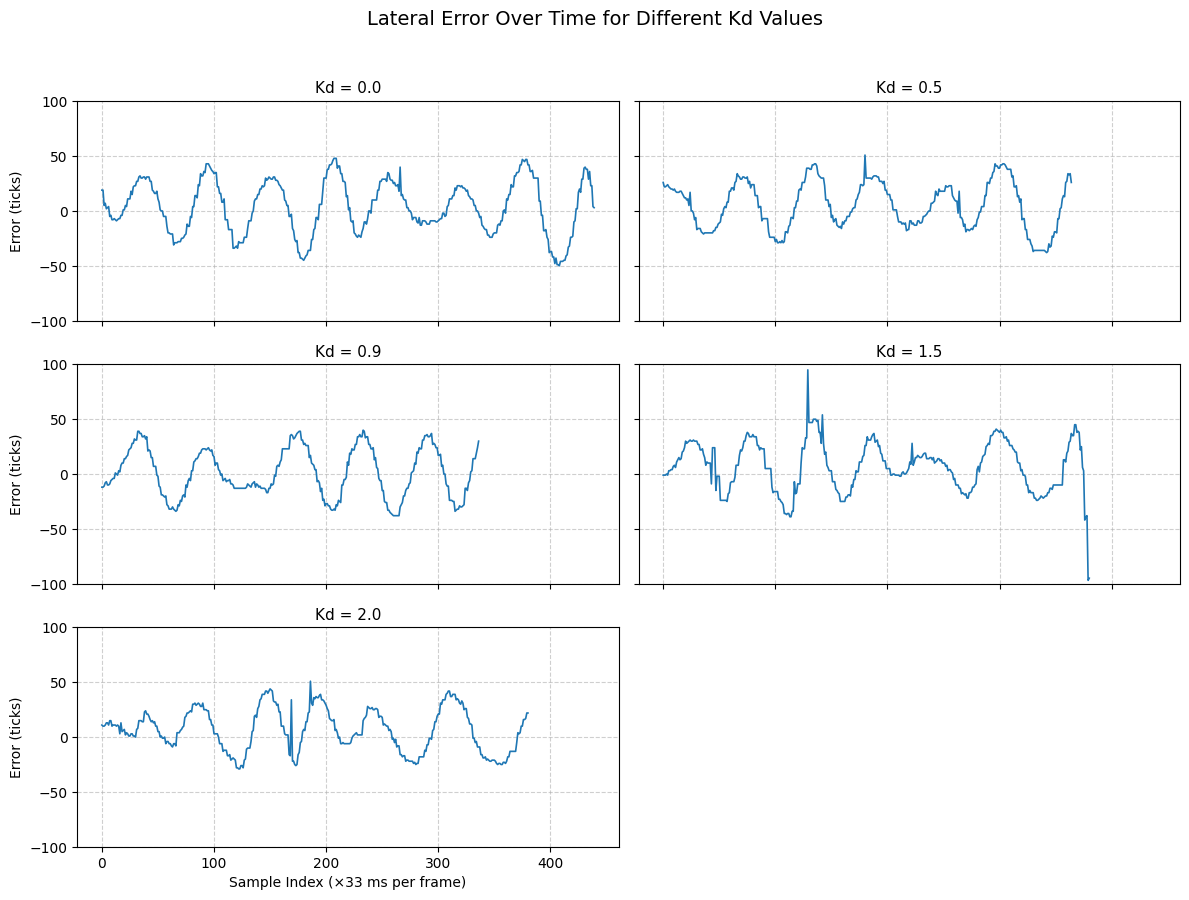

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import math

# -----------------------------------------
# Load all files matching kp*nav.txt
# -----------------------------------------
file_list = sorted(glob.glob("kd*nav.txt"))  # e.g. kp1nav.txt, kp2nav.txt, ...
if not file_list:
    raise FileNotFoundError("No files matching pattern 'kp*nav.txt' found.")

# -----------------------------------------
# Constants
# -----------------------------------------
CLOCK_FREQ_HZ = 24e6                   # 24 MHz system clock
TICK_PERIOD_S = 1 / CLOCK_FREQ_HZ      # seconds per timer tick (≈ 41.67 ns)
TICK_PERIOD_US = TICK_PERIOD_S * 1e6   # microseconds per tick (≈ 0.0417 µs)

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
datasets = []
for fname in file_list:
    with open(fname, "r") as f:
        data = [float(line.strip()) for line in f if line.strip()]
    data = np.array(data)[100:]  # discard startup
    x = np.arange(len(data))

    # Try to extract Kp value from filename (e.g., "kp1.5nav.txt" -> 1.5)
    m = re.search(r"kd([0-9.]+)", fname)
    kp_value = m.group(1) if m else fname
    datasets.append((kp_value, x, data))

# -----------------------------------------
# Plot each dataset in a 2×3 grid
# -----------------------------------------
cols, rows = 2, 3
num_plots = len(datasets)
num_rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(num_rows, cols, figsize=(12, 3*num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, (kp_value, x, data) in enumerate(datasets):
    ax = axes[i]
    ax.plot(x, data, label=f"Kd = {kp_value}", color="tab:blue", linewidth=1.2)
    ax.set_title(f"Kd = {kp_value}", fontsize=11)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_ylim(-100, 100)
    if i % cols == 0:
        ax.set_ylabel("Error (ticks)", fontsize=10)
    if i >= (num_rows - 1) * cols:
        ax.set_xlabel("Sample Index (×33 ms per frame)", fontsize=10)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Lateral Error Over Time for Different Kd Values", fontsize=14, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
